In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_opsd

In [10]:
opsd=get_opsd()

In [11]:
opsd.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


(3068, 6) (877, 6) (438, 6)


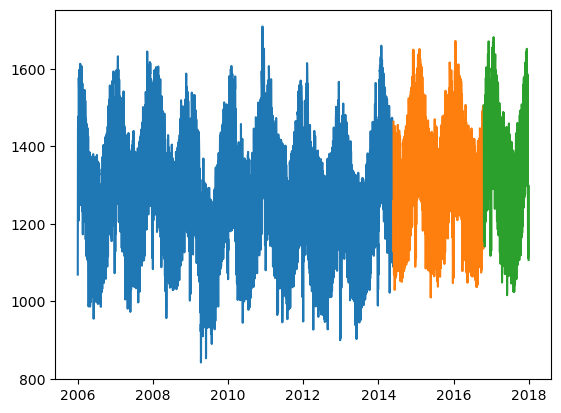

In [32]:
train_size=.90
val_size=.70
n=opsd.shape[0]
test_start_index=round(train_size * n)
val_start_index=round(val_size*n)

train=opsd[:val_start_index]
val=opsd[val_start_index:test_start_index]
test=opsd[test_start_index:]


print(train.shape, val.shape, test.shape)

plt.plot(train.index, train.Consumption)
plt.plot(val.index, val.Consumption)
plt.plot(test.index, test.Consumption)


<AxesSubplot:xlabel='Consumption', ylabel='Count'>

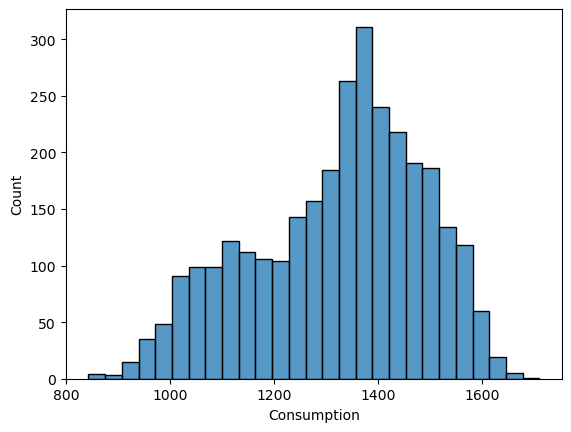

In [33]:
sns.histplot(train['Consumption'])

<AxesSubplot:xlabel='Date'>

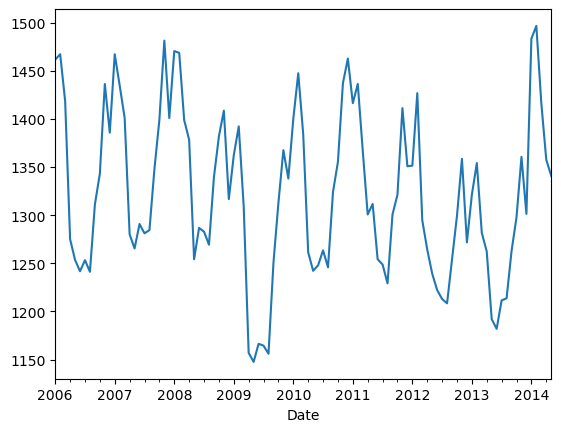

In [38]:
train['Consumption'].resample('M').mean().plot()

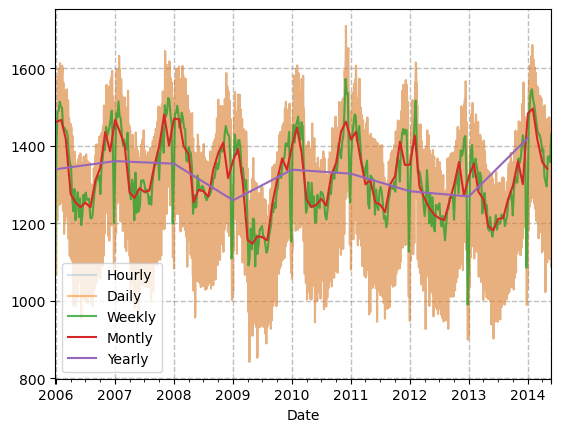

In [44]:
train['Consumption'].plot(alpha=.2, label='Hourly')
train['Consumption'].resample('D').mean().plot(alpha=.5, label='Daily')
train['Consumption'].resample('W').mean().plot(alpha=.8, label='Weekly')
train['Consumption'].resample('M').mean().plot(label='Montly')
train['Consumption'].resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.grid(color='grey', linestyle='--', linewidth=1, alpha=.5)

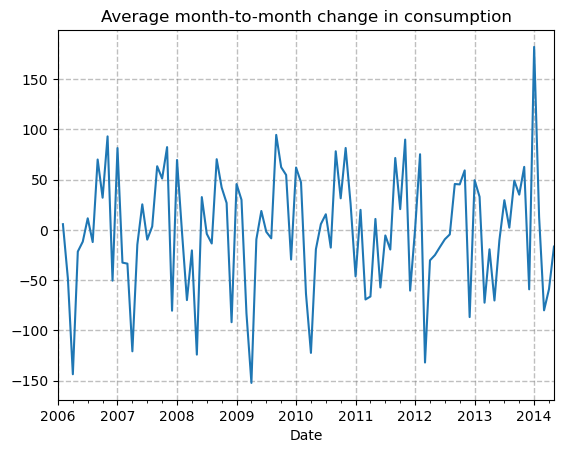

In [46]:
train['Consumption'].resample('M').mean().diff().plot(title='Average month-to-month change in consumption')
plt.grid(color='grey', linestyle='--', linewidth=1, alpha=.5)

Text(0.5, 0, 'Month')

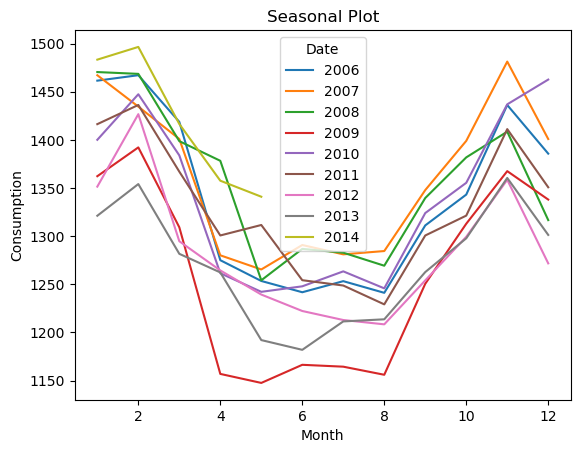

In [51]:
train['Consumption'].groupby([train.index.year, train.index.month]).mean().unstack(0).plot()
plt.title('Seasonal Plot')
plt.ylabel('Consumption')
plt.xlabel('Month')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

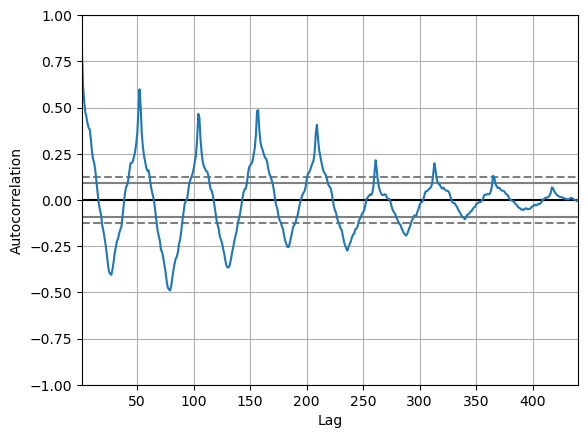

In [52]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())
